# Bruno Felipe de Souza Araujo
## CDN 3º Semestre
## Fatec Votorantim

In [ ]:
library(ggplot2)

In [ ]:
names <- c("horario", "temp", "vento", "umid", "sensa")
con <- url("https://ic.unicamp.br/~zanoni/cepagri/cepagri.csv")
cepagri <- read.table(con, header = FALSE, fill = TRUE, sep = ";", col.names = names)

In [ ]:
head (cepagri)

,horario,temp,vento,umid,sensa
,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,02/03/2014-19:08,23.7,59.3,77.1,22.6
2,02/03/2014-19:18,23.4,59.1,77.9,22.3
3,02/03/2014-19:28,23.2,56.7,78.9,22.1
4,02/03/2014-19:38,23.0,55.4,79.2,21.9
5,02/03/2014-19:48,22.8,52.6,79.7,21.7
6,02/03/2014-19:58,22.6,62.6,80.7,21.5


In [ ]:
tail(cepagri)

,horario,temp,vento,umid,sensa
,<chr>,<chr>,<dbl>,<dbl>,<dbl>
571417,03/04/2025-20:50,20.9,8.6,95.7,NA
571418,03/04/2025-21:00,20.9,9.9,95.6,NA
571419,03/04/2025-21:10,20.9,7.0,95.5,NA
571420,03/04/2025-21:20,20.9,6.3,95.5,NA
571421,03/04/2025-21:30,20.8,7.0,95.6,NA
571422,03/04/2025-21:40,20.9,7.5,95.7,NA


In [ ]:
class(cepagri)

[1] "data.frame"

In [ ]:
typeof(cepagri)

[1] "list"

In [ ]:
sapply(cepagri, class)

horario        temp       vento        umid       sensa 
"character" "character"   "numeric"   "numeric"   "numeric"

In [ ]:
cepagri$temp <- as.numeric(cepagri$temp)

Warning message:
“NAs introduced by coercion”


In [ ]:
class(cepagri$temp)

[1] "numeric"

In [ ]:
cepagri$horario <- as.POSIXct(cepagri$horario, format = '%d/%m/%Y-%H:%M', tz="America/Sao_Paulo")
class (cepagri$horario)

[1] "POSIXct" "POSIXt"

In [ ]:
totalcepagri <- nrow(cepagri)
print(totalcepagri)

[1] 571422


In [ ]:
cepagri <- cepagri[cepagri$horario >= "2025-01-01" & cepagri$horario < "2025-03-26",]
totalcepagri <- nrow(cepagri)
print(totalcepagri)

[1] 11843


In [ ]:
periodoleitura <- nrow(cepagri)
totalexcluidas <- (totalcepagri - periodoleitura)
print(totalexcluidas)

[1] 0


In [ ]:
cepagri$horario <- as.POSIXlt(cepagri$horario)
cepagri$ano <- unclass(cepagri$horario)$year + 1900
cepagri$mes <- unclass(cepagri$horario)$mon + 1

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'
Warning message:
“Removed 898 rows containing non-finite outside the scale range
(`stat_smooth()`).”
Warning message:
“Removed 898 rows containing missing values or values outside the scale range
(`geom_point()`).”


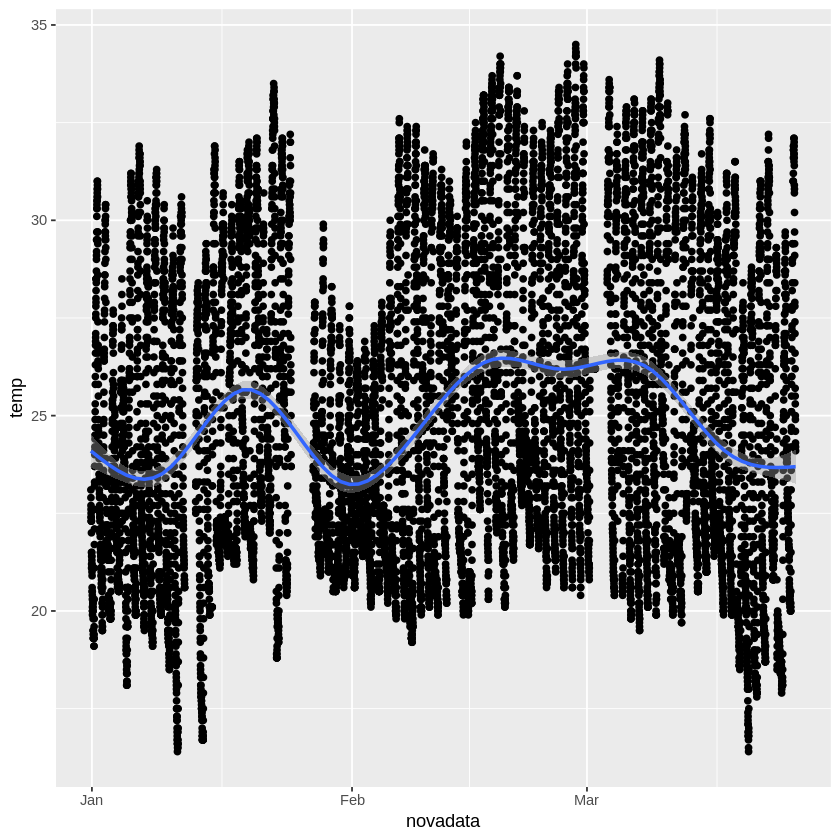

In [ ]:
novadata = as.POSIXct(cepagri$horario)
gtm18 <- ggplot (cepagri, aes (x = novadata, y= temp))
gtm18 <- gtm18 + geom_point()
gtm18 <- gtm18 +geom_smooth()
gtm18

In [ ]:
summary(cepagri)
med <- mean(cepagri$temp,na.rm = TRUE) #média de temperatura
md <- median(cepagri$temp, na.rm = TRUE) #mediana
sd(cepagri$temp,na.rm = TRUE) #desvio padrao
var(cepagri$temp,na.rm = TRUE) # variancia
mt <-max(cepagri$temp,na.rm = TRUE) # valor máximo
mint <- min(cepagri$temp,na.rm = TRUE) # valor mínimo
quantile(cepagri$temp,na.rm = TRUE) # gerando os quartis

    horario                            temp           vento       
 Min.   :2024-12-31 21:00:00.00   Min.   :16.40   Min.   : 0.000  
 1st Qu.:2025-01-23 01:45:00.00   1st Qu.:21.50   1st Qu.: 0.000  
 Median :2025-02-12 18:00:00.00   Median :24.00   Median : 4.800  
 Mean   :2025-02-12 11:04:16.49   Mean   :24.87   Mean   : 5.985  
 3rd Qu.:2025-03-05 07:25:00.00   3rd Qu.:28.20   3rd Qu.: 9.500  
 Max.   :2025-03-25 20:50:00.00   Max.   :34.50   Max.   :36.700  
                                  NA's   :898     NA's   :898     
      umid            sensa            ano            mes        
 Min.   :  0.00   Min.   : NA     Min.   :2024   Min.   : 1.000  
 1st Qu.:  0.00   1st Qu.: NA     1st Qu.:2025   1st Qu.: 1.000  
 Median : 65.50   Median : NA     Median :2025   Median : 2.000  
 Mean   : 53.35   Mean   :NaN     Mean   :2025   Mean   : 1.962  
 3rd Qu.: 85.20   3rd Qu.: NA     3rd Qu.:2025   3rd Qu.: 3.000  
 Max.   :100.00   Max.   : NA     Max.   :2025   Max.   :12.000  
 N

[1] 4.007486

[1] 16.05994

0%  25%  50%  75% 100% 
16.4 21.5 24.0 28.2 34.5

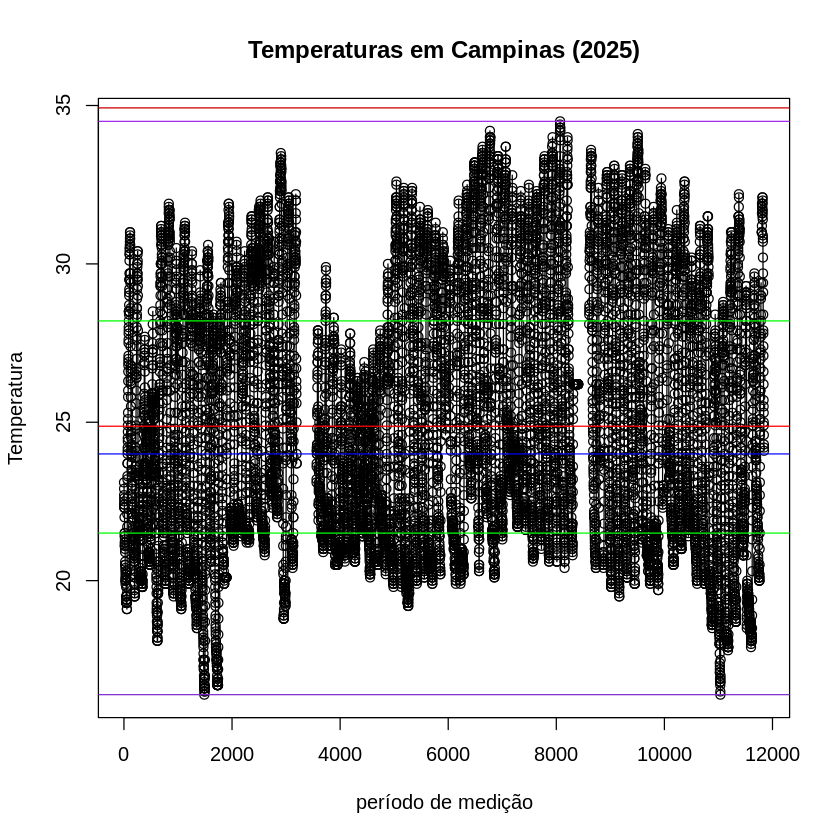

In [ ]:
plot(cepagri$temp, xlab = "período de medição", ylab = "Temperatura", main = "Temperaturas em Campinas (2025)")
lines(cepagri$temp) # plotando os dados em linha
abline(med,0,col="red") # indicador da média
abline(md,0,col="blue") # indicador da mediana
abline(mt,0,col="purple") # indicador do máximo
abline(mint,0,col="purple3") # indicador do minimo
quartis <- quantile (cepagri$temp,na.rm = TRUE) # armazenando os quartis
abline(quartis [[2]],0,col="green1") # plotando o 2.0 quartil
abline(quartis [[4]],0,col="green1") # plotando o 4.0 quartil
amplitude <- quartis [[4]]- quartis [[2]] # calculando a amplitude
limsup <- mean(cepagri$temp,na.rm = TRUE) + 1.5 * amplitude #interpolacao para encontrar limites
liminf <- mean(cepagri$temp, na.rm = TRUE) - 1.5 * amplitude #interpolacao para encontrar limites
abline(limsup, 0,col="red3") # plotando o limite superior
abline(liminf,0,col="red3") # plotando o limite inferior